In [1]:
import time
from pynq import Overlay
from pynq import MMIO

ol = Overlay("/home/xilinx/jupyter_notebooks/fir128/design_128.bit")
ol.download()

fir_ip=MMIO(0x43C00000, 0x10000)


In [2]:
with open('/home/xilinx/jupyter_notebooks/fir128/input.dat', 'r') as file:
    inputdata = file.read()

In [3]:
inputlist = inputdata.splitlines()
inputlist = [int(i) for i in inputlist]

In [4]:
def twos_comp(val, bits):
    # write code here
    if (val & (1 << (bits-1))) != 0:
        val = val - (1 << bits)
    return val

In [5]:
# writing data to pynq
outputlist = []
t_start = time.time()
for i in range(len(inputlist)):
    fir_ip.write(0x20, inputlist[i])
    inp_2s = twos_comp(fir_ip.read(0x20), 32)
    #print("input:", inp_2s)
    fir_ip.write(0x00, 1)
    out_2s = twos_comp(fir_ip.read(0x10), 32)
    #print("output:", out_2s)
    #fir_ip.write(0x00, 7)
    outputlist.append(out_2s)
t_stop = time.time()
print('Hardware execution time: ', t_stop-t_start)

Hardware execution time:  0.07480645179748535


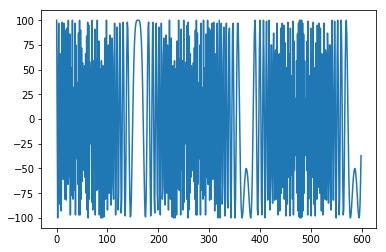

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(inputlist)
plt.show()

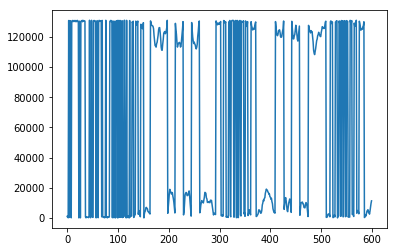

In [8]:
plt.figure()
plt.plot(outputlist)
plt.show()

1
